# Execute the code below

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px

link = "https://raw.githubusercontent.com/LucaSainteCroix/teaching-resources/main/exercises-data/weather2019.csv"
df_weather = pd.read_csv(link)

# Multivariate linear regression with Scikit-Learn

The equation of an univariate linear regresion is a line :` aX +b`

The equation of a multivariate linear regression with 2 variables is a plan : `aW + bX + c`

The equation of a multivariate linear regression with n variables is a hyperplan : `a1 X1 + a2 X2 + .... + an Xn + b`


## Let's start with 2 variables
With Plotly express, show a [3D scatterplot ](https://plotly.com/python/plotly-express/#3d-coordinates)with :
- X-axis : MAX temperature
- Y-axis : MIN temperature
- Z-axis : Sunhours


In [2]:
# Complete x, y and z in the script below:
px.scatter_3d(x = 'MAX_TEMPERATURE_C',
              y = 'MIN_TEMPERATURE_C',
              z= 'SUNHOUR',
              data_frame=df_weather)


Is it hard to read the 3D scatterplot ? You can move it with your mouse.

### Let's predict
You have to predict the MAX temperature from 2 variables :
- MIN temperature
- Sunhours

Hey, it's the reason why X has 2 brackets and is uppercase and y has a simple bracket and is lowercase . It can take multiple variables (X) to predict only one target (y).

**Remember to save the result of your prediction in a new column 'predict'.**

In [4]:
# Your code here :
from sklearn.linear_model import LinearRegression
modelLR = LinearRegression().fit(X, y)

X = df_weather[['MIN_TEMPERATURE_C', 'SUNHOUR']]
y = df_weather['MAX_TEMPERATURE_C']

df_weather['predict'] = modelLR.predict(X)



### Let's visualize
With Plotly express, show a 3D scatterplot with :

- X-axis : your new 'predict' column
- Y-axis : MIN temperature
- Z-axis : Sunhours



In [5]:
# Your code here :
px.scatter_3d(x = 'predict',
              y = 'MIN_TEMPERATURE_C',
              z= 'SUNHOUR',
              data_frame=df_weather)

**Move the cube with your mouse. Hey your 3D-scatterplot has a special shape : it's a plan !**

## Multivariate linear regressions with N-variables
Make a prediction with the maximum number of variables. But beware :
- variables must be numeric
- your target (MAX temperature) should not be present in variables

Store your prediction in a new column 'predict2'.

In our 3D human vision, we can't represent a hyperplan. But, let's trust in our computer, it can calculate. So trust it and show a simple scatterplot with :
- X-axis : Date
- Y-axis : MAX temperatures in blue dots and 'predict2' in orange dots

Expected result:

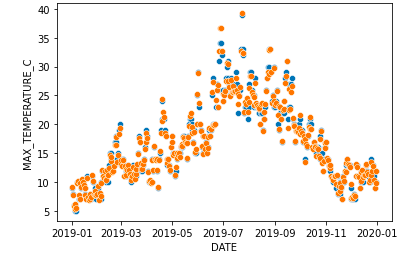

<Axes: xlabel='DATE', ylabel='MAX_TEMPERATURE_C'>

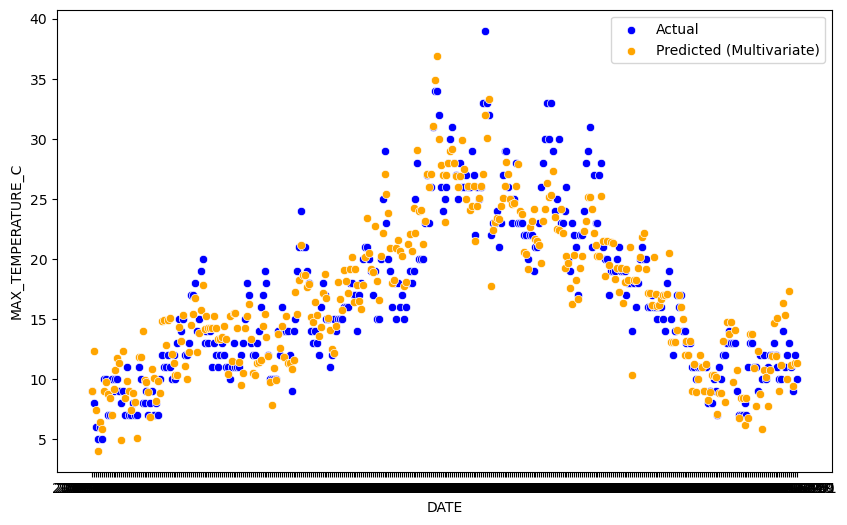

In [11]:
# Your code here :

x = df_weather.select_dtypes(include='number').drop(columns=['MAX_TEMPERATURE_C', 'predict'])
y = df_weather['MAX_TEMPERATURE_C']

df_weather['predict2'] = modelLR.predict(X)

plt.figure(figsize=(10, 6))

sns.scatterplot(data=df_weather, x="DATE", y="MAX_TEMPERATURE_C", color='blue', label='Actual')

sns.scatterplot(data=df_weather, x="DATE", y="predict2", color='orange', label='Predicted (Multivariate)')



You can read coefficient for each column with the attribute `.coef_`. Which column has the biggest coefficient ?

In [10]:
# Your code here :

modelLR.fit(X, df_weather['MAX_TEMPERATURE_C'])

df_weather['predict2'] = modelLR.predict(X)

coefficients = modelLR.coef_
columns = X.columns

for feature, coefficient in zip(columns, coefficients):
    print(f'{feature}: {coefficient}')

MIN_TEMPERATURE_C: 0.9886738269230044
SUNHOUR: 0.6622240192647239
